In [431]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC   
from sklearn.model_selection import GridSearchCV                 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, classification_report


In [432]:
# test = pd.read_csv('testing.csv', header=None, skiprows=1)

train = pd.read_csv('./feature_extraction/training.csv')
validation = pd.read_csv('./feature_extraction/validation.csv', header=None, skiprows=1)
X = pd.read_csv('./feature_extraction/training.csv')


In [433]:
train.drop(['song_name'], axis=1, inplace=True)
train.head()

,mean_spectral_rolloff,std_spectral_rolloff,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_flatness,std_spectral_flatness,mean_spectral_contrast,std_spectral_contrast,...,chroma_9_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_12_mean,chroma_12_std,chroma_std_mean,chroma_std_std,label
0,3042.260232,885.457204,1552.811865,395.559911,1747.702312,276.141616,0.002631,0.003345,22.197517,8.725292,...,0.017231,0.018436,0.018744,0.031178,0.034395,0.005757,0.010093,0.021984,0.010099,0
1,3579.757627,1254.184130,1835.004266,586.003361,1748.172116,297.397392,0.003238,0.004356,21.466338,7.936384,...,0.028426,0.005691,0.007263,0.009544,0.011316,0.010711,0.020425,0.014912,0.007659,0
2,3782.316288,1123.795795,1719.368948,404.082721,2031.740381,324.873388,0.002594,0.003045,22.380886,9.445157,...,0.010903,0.015983,0.017607,0.086040,0.074920,0.003224,0.007791,0.041517,0.020867,0
3,3943.490565,1169.460660,1817.150863,546.110008,1973.773306,337.742672,0.002708,0.003212,21.161950,7.956338,...,0.020149,0.010181,0.017838,0.035706,0.042762,0.011003,0.019487,0.028602,0.013036,0
4,2738.638738,976.165389,1360.641197,507.016163,1567.565225,212.688766,0.000767,0.001077,22.135716,6.739982,...,0.018076,0.013796,0.023146,0.013583,0.015784,0.002274,0.005079,0.038896,0.020987,0


In [434]:
# check to see if all labels are ints
train['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [435]:
X.drop(['song_name'], axis=1, inplace=True)
X.drop(['label'], axis=1, inplace=True)
X.head()

,mean_spectral_rolloff,std_spectral_rolloff,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_flatness,std_spectral_flatness,mean_spectral_contrast,std_spectral_contrast,...,chroma_9_mean,chroma_9_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_12_mean,chroma_12_std,chroma_std_mean,chroma_std_std
0,3042.260232,885.457204,1552.811865,395.559911,1747.702312,276.141616,0.002631,0.003345,22.197517,8.725292,...,0.010910,0.017231,0.018436,0.018744,0.031178,0.034395,0.005757,0.010093,0.021984,0.010099
1,3579.757627,1254.184130,1835.004266,586.003361,1748.172116,297.397392,0.003238,0.004356,21.466338,7.936384,...,0.023868,0.028426,0.005691,0.007263,0.009544,0.011316,0.010711,0.020425,0.014912,0.007659
2,3782.316288,1123.795795,1719.368948,404.082721,2031.740381,324.873388,0.002594,0.003045,22.380886,9.445157,...,0.006091,0.010903,0.015983,0.017607,0.086040,0.074920,0.003224,0.007791,0.041517,0.020867
3,3943.490565,1169.460660,1817.150863,546.110008,1973.773306,337.742672,0.002708,0.003212,21.161950,7.956338,...,0.007950,0.020149,0.010181,0.017838,0.035706,0.042762,0.011003,0.019487,0.028602,0.013036
4,2738.638738,976.165389,1360.641197,507.016163,1567.565225,212.688766,0.000767,0.001077,22.135716,6.739982,...,0.007553,0.018076,0.013796,0.023146,0.013583,0.015784,0.002274,0.005079,0.038896,0.020987


In [436]:
y = train['label'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [437]:
# Normalization of Data
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X.iloc[:, :-1], dtype = float))


In [447]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, random_state=15, stratify=y)

In [448]:
y_train.head()

209    2
342    4
75     1
500    6
633    8
Name: label, dtype: int64

In [449]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [450]:
# Quantile Transformer reduces accuracy
#Conversion from a col vector to a 1D array
#y_test=np.ravel(y_test) 
#y_train=np.ravel(y_train) 

#qt = QuantileTransformer(n_quantiles=50, random_state=0)         # This section normalize the data csv

#X_train=qt.fit_transform(X_train)                                 
#X_train=pd.DataFrame(X_train) 

#X_test=qt.fit_transform(X_test)                                 
#X_test=pd.DataFrame(X_test) 


In [451]:
#y_test.head()
y_test.shape

(250,)

In [452]:
# C: how much you want to avoid misclassifying each training example.
# # Gamma: how far the influence of a single training example reaches

parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 20]
             }

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

cls=SVC()
model = GridSearchCV(cls, param_grid)
model.fit(X_train,y_train,groups=None)


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [453]:
# Testing 

test_pred = model.predict(X_test)

np.savetxt("accuracy_solution.csv", 
           np.dstack((np.arange(1, test_pred.size+1),test_pred))[0],
           delimiter=',', comments="", fmt='%i,%i',
           header="Sample_id,Sample_label")

Accuracy :  0.712
Balanced Accuracy :  0.7081311442181009
Matthews Correlation Coefficient:  0.6820751697460775


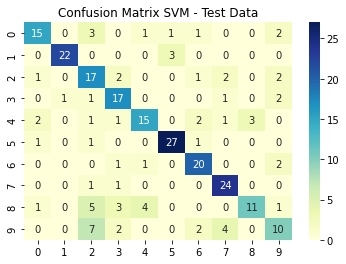

<Figure size 432x288 with 0 Axes>

In [454]:
print("Accuracy : ", accuracy_score(y_test, test_pred))
print("Balanced Accuracy : ", balanced_accuracy_score(y_test, test_pred))
print("Matthews Correlation Coefficient: ", matthews_corrcoef(y_test, test_pred))

conf_matrix = confusion_matrix(y_test, test_pred)
#print('\033[1m' + "\n Table 1: Confusion Matrix of Test Data \n\n" + '\033[0m', conf_matrix)

df_cm = pd.DataFrame(conf_matrix, index = [i for i in range(10)],
                columns = [i for i in range(10)])

plt.title('Confusion Matrix SVM - Test Data')
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.savefig('./confusion_matrix_svm_test.png')
plt.show()
plt.clf()

In [455]:
print(classification_report(y_test, test_pred, digits=3))

              precision    recall  f1-score   support

           0      0.750     0.652     0.698        23
           1      0.957     0.880     0.917        25
           2      0.472     0.680     0.557        25
           3      0.630     0.773     0.694        22
           4      0.714     0.600     0.652        25
           5      0.871     0.900     0.885        30
           6      0.741     0.833     0.784        24
           7      0.750     0.923     0.828        26
           8      0.786     0.440     0.564        25
           9      0.526     0.400     0.455        25

    accuracy                          0.712       250
   macro avg      0.720     0.708     0.703       250
weighted avg      0.724     0.712     0.707       250

